In [168]:
import numpy as np
import pandas as pd
from seaborn import heatmap
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, make_scorer, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from itertools import chain

In [148]:
df = pd.read_csv('dataset_ZavarzinE_filna_by_regression.csv', index_col=False)
y_cols = ['химшлак последний Al2O3', 'химшлак последний CaO', 
          'химшлак последний FeO', 'химшлак последний MgO',
          'химшлак последний MnO', 'химшлак последний R',
          'химшлак последний SiO2']
X = df.drop(columns=y_cols)
y = df.filter(y_cols)
print('X:', X.shape)
print('y', y.shape)
X, X_val, y, y_val = train_test_split(X, y, test_size=0.1)
del df


X: (6205, 53)
y (6205, 7)


<AxesSubplot:>

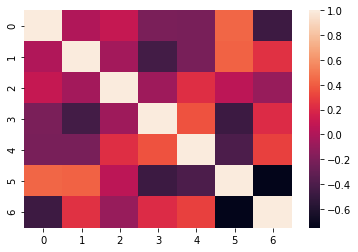

In [149]:
cov = np.corrcoef(y.transpose())
heatmap(cov)

In [150]:
mape_scorer = make_scorer(mean_absolute_percentage_error)
report = []
def check_model(estimator, name):
    scores = []
    for y_col in tqdm(y_cols):
        col_scores = []
        col_scores.append(
            cross_val_score(estimator, X, y[y_col], cv=5, n_jobs=-1, scoring=mape_scorer).mean())
        estimator.fit(X, y[y_col])
        y_val_pred = estimator.predict(X_val)
        col_scores.append(mean_absolute_percentage_error(y_val[y_col], y_val_pred))
        col_scores.append(r2_score(y_val[y_col], y_val_pred))
        scores.append(col_scores)
    report.append([name] + scores)
    return scores

In [151]:
check_model(LinearRegression(), 'LinearRegression')

100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


[[0.09508482072745951, 0.09030974394560382, 0.5173425763809476],
 [0.04743365646618504, 0.04583970977090325, 0.22036599047163008],
 [0.3489836975618835, 0.3476423614666538, 0.051482724920888456],
 [0.257631752523961, 0.2547054028946918, 0.40453124179216937],
 [0.29804843007672355, 0.292494128785636, 0.17989471992784256],
 [0.060239510449948644, 0.05831434157629556, 0.36638203681511905],
 [0.06676917410978453, 0.06868813486898871, 0.2044783109090791]]

In [152]:
check_model(RandomForestRegressor(), 'RandomForestRegressor')

100%|██████████| 7/7 [06:27<00:00, 55.33s/it]


[[0.09629386075061047, 0.09160717701582739, 0.4817138549501495],
 [0.04734396016190841, 0.045248187773931095, 0.23344813151734678],
 [0.3522002705945384, 0.34987346957032933, 0.048983923516658145],
 [0.26064549787096386, 0.2596897490352466, 0.3921959377987825],
 [0.31979001063944906, 0.33310936941443003, -0.27846223647540325],
 [0.0594679146950024, 0.05796300992669043, 0.36767617688473464],
 [0.06708177103525931, 0.06953815816821567, 0.2044654708357202]]

In [153]:
check_model(GradientBoostingRegressor(), 'GradientBoostingRegressor')

100%|██████████| 7/7 [01:27<00:00, 12.49s/it]


[[0.09599743503802605, 0.0903433072712041, 0.49973595084695344],
 [0.04737330425703744, 0.045760302587108684, 0.22508184456209535],
 [0.3491697944690907, 0.34957804256005903, 0.0460945615356394],
 [0.25973884287744375, 0.25848398119723326, 0.4027198740199226],
 [0.30631869135417267, 0.31525445975311517, -0.4549159119986166],
 [0.058624841549325554, 0.056923659187327835, 0.3863970182732054],
 [0.06622227443629207, 0.06911423881571324, 0.20293025433128387]]

In [171]:
with open('report.csv', 'w') as report_file:
    report_file.writelines(['\t'.join(map(str, [report_line[0]] + list(chain.from_iterable(report_line[1:])))).replace('.', ',')+'\n' for report_line in report])

In [155]:
mean_absolute_percentage_error(y_val, LinearRegression().fit(X, y).predict(X_val))

0.16542768904414656